In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("pizza_v2[1].csv")

# Display Top 5 Rows of Dataset

In [3]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


# Information About Our Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


# Check Null Value In The Dataset

In [5]:
df.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

# Data Preprocessing

In [6]:
df.rename({'price_rupiah':'price'},axis=1,inplace=True)

In [7]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [8]:
df["price"]=df["price"].str.replace("Rp","")
df["price"]=df["price"].str.replace(",","").astype('int32')

In [9]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [10]:
df["company"].value_counts()


C    30
E    30
A    25
B    24
D    20
Name: company, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price            129 non-null    int32 
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: int32(1), object(8)
memory usage: 8.7+ KB


In [12]:
def convert(value):
    return value*0.0054

In [13]:
df["price"]=df["price"].apply(convert)

In [14]:
#Insight This RP convert into indian currency

In [15]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [16]:
df["diameter"]=df["diameter"].str.replace("inch","")

In [17]:
df["diameter"]=df["diameter"].str.replace(" ","").astype("float32")

# Data Analysis

# Univariate Analysis

In [18]:
df.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

# Company

In [19]:
df["company"].value_counts()

C    30
E    30
A    25
B    24
D    20
Name: company, dtype: int64

# Price

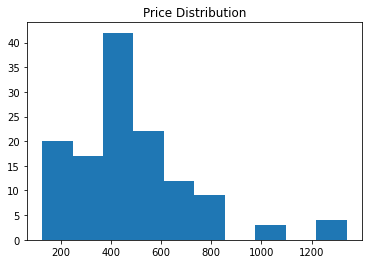

In [20]:
plt.hist(x="price",data=df)
plt.title("Price Distribution")
plt.show()

In [21]:
#Insight:-The price distribution is right skewed

# Diameter

In [22]:
df["diameter"].value_counts()

12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: diameter, dtype: int64

<AxesSubplot:xlabel='diameter', ylabel='count'>

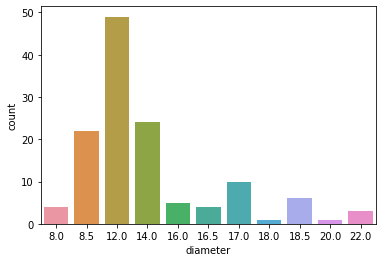

In [23]:
sns.countplot(x=df["diameter"])

In [24]:
#Insight:-The diameter distribution is skewed right

# Topping

<AxesSubplot:xlabel='count', ylabel='topping'>

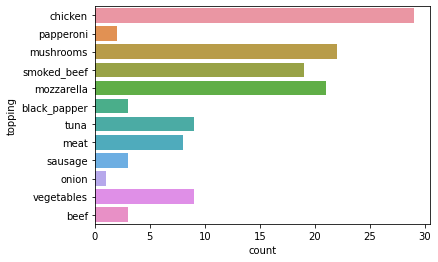

In [25]:
sns.countplot(y=df["topping"])

In [26]:
#Insight:-We can see that The most popular topping among the pizza is chicken,mushrooms,smoked_beef,mozzarella

# Variant

In [27]:
df["variant"].value_counts()

classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: variant, dtype: int64

<AxesSubplot:xlabel='count', ylabel='variant'>

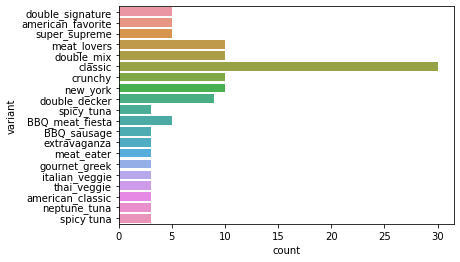

In [28]:
sns.countplot(y=df["variant"])

In [29]:
#Insight:-we can see that the most popular variant is classic

# Size

In [30]:
df["size"].value_counts()

medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: size, dtype: int64

In [31]:
df["size"].value_counts()

medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: size, dtype: int64

In [32]:
df["extra_sauce"].value_counts()

yes    76
no     53
Name: extra_sauce, dtype: int64

<AxesSubplot:xlabel='size', ylabel='count'>

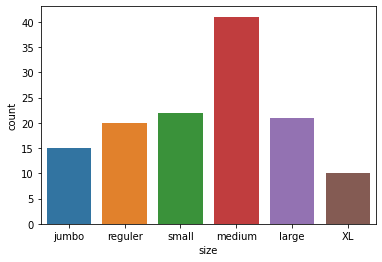

In [33]:
sns.countplot(x=df["size"])

In [34]:
#Insight:-we can see that the most common size of pizza is medium

# Extra Sauce

<AxesSubplot:xlabel='extra_sauce', ylabel='count'>

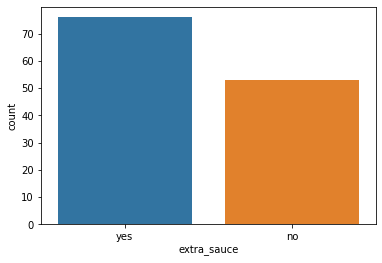

In [35]:
sns.countplot(x=df["extra_sauce"])

<AxesSubplot:xlabel='extra_cheese', ylabel='count'>

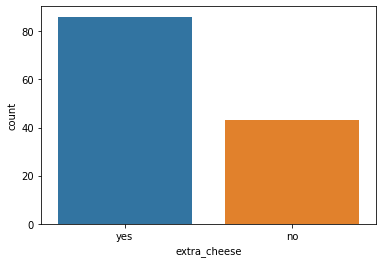

In [36]:
sns.countplot(x=df["extra_cheese"])

<AxesSubplot:xlabel='extra_mushrooms', ylabel='count'>

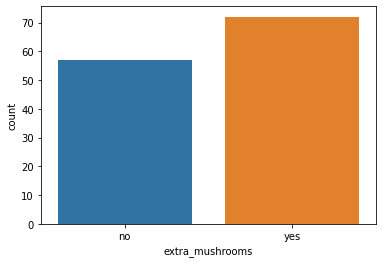

In [37]:
sns.countplot(x=df["extra_mushrooms"])

In [38]:
#Insight:-We can see above graph most commonly prefer Extra_cheese Topping

# Bivariate Analysis

# Price by Company

In [39]:
df.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

<AxesSubplot:xlabel='company', ylabel='price'>

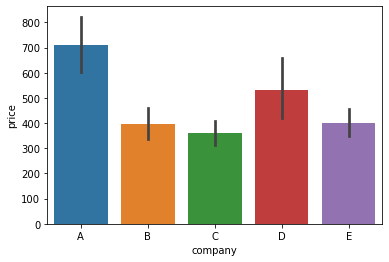

In [40]:
sns.barplot(df["company"],df["price"])

In [41]:
#insight:-We can see that company A pizza on average are more expensive then other 

# Price by topping

<AxesSubplot:xlabel='price', ylabel='topping'>

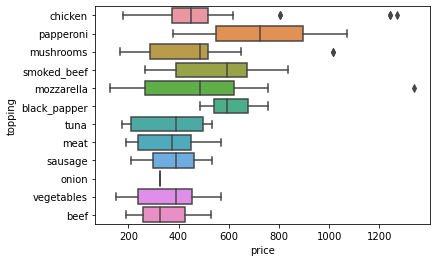

In [42]:
sns.boxplot(y="topping",x="price",data=df)

In [43]:
#Insight:-From this boxplot we can see that this papperoni pizza on average are more expensive on other pizza 
# you can see outlier in chicken,mushrooms and mozzarella pizza 
#here you can see it look like just 1 onion pizza 

# Price by Size

<AxesSubplot:xlabel='size', ylabel='price'>

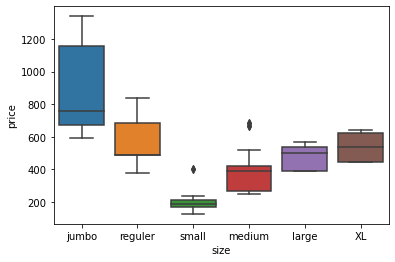

In [44]:
sns.boxplot(x="size",y="price",data=df)

In [45]:
#Insight:-From this boxplot we can see that jumbo and regular
#pizza are more expensive 
#you can see outlier in small and medium size pizza

# Find the most expensive pizza

In [46]:
df[df["price"].max()==df["price"]]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [47]:
#Insight:-o/p we can see that double_signature variant of the pizza is
#the most expensive pizza as per our dataset

# Find diameter of jumbo size pizzas

In [48]:
df[df["size"]=="jumbo"]["diameter"].head()

0    22.0
1    20.0
4    18.0
5    18.5
6    16.0
Name: diameter, dtype: float32

In [49]:
#Insight:-size of jumbo pizza is higher than XL thats why in jumbo pizzadiametre of 16 is outlier

# Find diameter of XL size pizzas

In [50]:
df[df["size"]=="XL"]["diameter"].head()

29    17.0
35    17.0
41    17.0
47    17.0
93    17.0
Name: diameter, dtype: float32

# Let's remove outliers

In [51]:
df[(df["size"]=="jumbo") & (df["diameter"]<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,594.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,594.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [52]:
df=df.drop(df.index[[6,11,16,80]])

In [53]:
df[(df["size"]=="jumbo") & (df["diameter"]<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms


# Label Encoding

In [54]:
cat_cols=df.select_dtypes(include=["object"]).columns

In [55]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [56]:
df["company"].value_counts()


C    30
E    30
B    24
A    22
D    19
Name: company, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
    

In [59]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


In [60]:
df["company"].value_counts()

2    30
4    30
1    24
0    22
3    19
Name: company, dtype: int64

# Store Feature Matrix In X and Target In Vector y

In [61]:
x=df.drop('price',axis=1)

In [98]:
y=df["price"]
y


0      1269.0
1      1069.2
2       648.0
3       837.0
4      1339.2
        ...  
124     210.6
125     388.8
126     534.6
127     237.6
128     421.2
Name: price, Length: 125, dtype: float64

# spliting the dataset into training set and testings set

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

# Import the models

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Model Training

In [66]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

svm=SVR()
svm.fit(xtrain,ytrain)

rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)

gb=GradientBoostingRegressor()
gb.fit(xtrain,ytrain)

xg=XGBRegressor()
xg.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Prediction on Test Data

In [67]:
y_pred1=lr.predict(xtest)
y_pred2=svm.predict(xtest)
y_pred3=rf.predict(xtest)
y_pred4=gb.predict(xtest)
y_pred5=xg.predict(xtest)

# Evaluating the Algorithm

In [68]:
from sklearn import metrics

In [69]:
score1=metrics.r2_score(ytest,y_pred1)
score2=metrics.r2_score(ytest,y_pred2)
score3=metrics.r2_score(ytest,y_pred3)
score4=metrics.r2_score(ytest,y_pred4)
score5=metrics.r2_score(ytest,y_pred5)

In [70]:
print(score1,score2,score3,score4,score5)

0.6712827779795154 -0.058422678416528706 0.8381019742808627 0.8918445776388462 0.9037532335665138


In [71]:
final_data=pd.DataFrame({'Models':['LR','SVR','RF','GB','XGB'],'R2_SCORE':[score1,score2,score3,score4,score5]})

In [72]:
final_data

,Models,R2_SCORE
0,LR,0.671283
1,SVR,-0.058423
2,RF,0.838102
3,GB,0.891845
4,XGB,0.903753


<AxesSubplot:xlabel='Models', ylabel='R2_SCORE'>

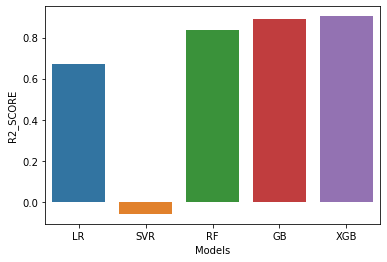

In [73]:
sns.barplot(final_data['Models'],final_data['R2_SCORE'])

In [74]:
#Insight:-From this barplot we can see that XGBoost Regressor is the best model for this data set

# Feature Importance

# Random Forest

In [75]:
rf.feature_importances_

array([0.02865716, 0.60944795, 0.03498034, 0.11524636, 0.17144883,
       0.02382672, 0.01146109, 0.00493156])

In [76]:
fea=pd.Series(rf.feature_importances_,index=xtrain.columns)

In [77]:
fea

company            0.028657
diameter           0.609448
topping            0.034980
variant            0.115246
size               0.171449
extra_sauce        0.023827
extra_cheese       0.011461
extra_mushrooms    0.004932
dtype: float64

<AxesSubplot:>

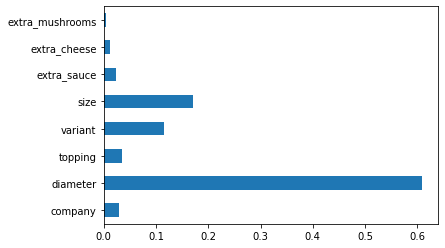

In [78]:
fea.plot(kind='barh')

In [79]:
#insight:-we can see that RandomForestRegressor is given importance to the diameter

# Gradient Boosting Regressor

gb.feature_importances_

In [80]:
fea=pd.Series(gb.feature_importances_,index=xtrain.columns)

<AxesSubplot:>

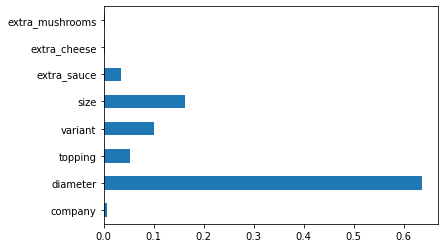

In [81]:
fea.plot(kind='barh')

In [82]:
#Insight:-We can see that GradientBoostingRegressor is given importance to the diameter

# XGBRegressor

In [83]:
xg.feature_importances_

array([0.003974  , 0.43592376, 0.02142869, 0.03392151, 0.3578377 ,
       0.12908663, 0.01259   , 0.00523772], dtype=float32)

In [84]:
fea=pd.Series(xg.feature_importances_,index=xtrain.columns)

<AxesSubplot:>

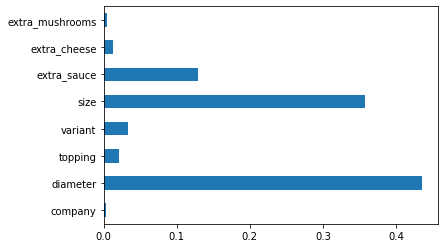

In [85]:
fea.plot(kind='barh')

In [86]:
#Insight:-We can see that XGBoostRegressor is give importance to the diameter and size

# Save Model

In [87]:
df.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [88]:
df["variant"].value_counts()

4     30
15    10
7     10
5     10
6      9
13     8
8      5
0      5
18     4
3      4
17     3
1      3
9      3
12     3
10     3
11     3
19     3
2      3
14     3
16     3
Name: variant, dtype: int64

In [89]:
df["company"].value_counts()

2    30
4    30
1    24
0    22
3    19
Name: company, dtype: int64

In [90]:
df["diameter"].value_counts()

12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
8.0      4
16.5     4
22.0     3
20.0     1
16.0     1
18.0     1
Name: diameter, dtype: int64

In [91]:
df["topping"].value_counts()

2     29
5     22
4     21
9     16
10     9
11     9
3      8
8      3
0      3
7      2
1      2
6      1
Name: topping, dtype: int64

In [92]:
indata=[{"company":1,"diameter":22.0,"topping":2,"variant":8,"size":1,"extra_sauce":1,"extra_cheese":1,"extra_mushrooms":1}]

In [93]:
new_df=pd.DataFrame(data=indata,columns=['company','diameter','topping','variant','size','extra_sauce','extra_cheese','extra_mushrooms'])

In [100]:
new_df

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,1,22.0,2,8,1,1,1,1


In [102]:
import pickle

In [104]:
pickle.dump(le,open("labeltransformer.pkl","wb"))
pickle.dump(lr,open("logisticmodel.pkl","wb"))